In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

/var/folders/4k/4b01rf9j7cl6mcd3652m260w0000gn/T/ipykernel_302/2080034654.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
cdf = pd.read_csv("datos_de_clientes.csv", delimiter="\t")
cdf

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


Lograr separar las columnas


# Transformación 1: Marital Status

Transformamos marital status para que quede con las caracteristicas correctas

In [3]:
estado_social = set(cdf["Marital_Status"])
estado_social

{'Absurd',
 'Alone',
 'Divorced',
 'Married',
 'Single',
 'Together',
 'Widow',
 'YOLO'}

In [4]:
absurd = 'Absurd'
conteo_social_absurd = (cdf['Marital_Status'] == absurd).sum()
print(f'El estado "{absurd}" se repite {conteo_social_absurd} veces.')

yolo = 'YOLO'
conteo_social_yolo = (cdf['Marital_Status'] == yolo).sum()
print(f'El estado "{yolo}" se repite {conteo_social_yolo} veces.')

alone = 'Alone'
conteo_social_alone = (cdf['Marital_Status'] == alone).sum()
print(f'El estado "{alone}" se repite {conteo_social_alone} veces.')

El estado "Absurd" se repite 2 veces.
El estado "YOLO" se repite 2 veces.
El estado "Alone" se repite 3 veces.


In [5]:
cdf = cdf.drop(cdf[cdf['Marital_Status'] == 'YOLO'].index)
cdf = cdf.drop(cdf[cdf['Marital_Status'] == 'Absurd'].index)
cdf = cdf.replace('Alone', 'Single')

divorced = 'Divorced'
conteo_social_divorced = (cdf['Marital_Status'] == divorced).sum()
print(f'El estado "{divorced}" se repite {conteo_social_divorced} veces.')

single = 'Single'
conteo_social_single = (cdf['Marital_Status'] == single).sum()
print(f'El estado "{single}" se repite {conteo_social_single} veces.')

married = 'Married'
conteo_social_married = (cdf['Marital_Status'] == married).sum()
print(f'El estado "{married}" se repite {conteo_social_married} veces.')

widow = 'Widow'
conteo_social_widow = (cdf['Marital_Status'] == widow).sum()
print(f'El estado "{widow}" se repite {conteo_social_widow} veces.')

together = 'Together'
conteo_social_together = (cdf['Marital_Status'] == together).sum()
print(f'El estado "{together}" se repite {conteo_social_together} veces.')

estado_social = set(cdf["Marital_Status"])
estado_social

El estado "Divorced" se repite 232 veces.
El estado "Single" se repite 483 veces.
El estado "Married" se repite 864 veces.
El estado "Widow" se repite 77 veces.
El estado "Together" se repite 580 veces.


{'Divorced', 'Married', 'Single', 'Together', 'Widow'}

In [6]:
cdf.iloc[:,3]

cdf = cdf.replace('Married', 'Couple')
cdf = cdf.replace('Together', 'Couple')
cdf = cdf.replace('Divorced', 'Single')
cdf = cdf.replace('Widow', 'Single')

social_numerico = {'Couple': 0, 'Single': 1}
cdf['Marital_Num'] = cdf['Marital_Status'].map(social_numerico)
soc_num = cdf.pop('Marital_Num')
cdf.insert(3, 'Marital_Num', soc_num)

cdf = cdf.drop(['Marital_Status'], axis=1)
cdf

,ID,Year_Birth,Education,Marital_Num,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,1,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,1,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,0,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,0,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,0,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,0,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,0,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,1,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,0,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [7]:
idx_columnas = cdf.columns.tolist()
for idx, nombre_columna in enumerate(idx_columnas):
    print(f"Índice de la columna '{nombre_columna}': {idx}")

Índice de la columna 'ID': 0
Índice de la columna 'Year_Birth': 1
Índice de la columna 'Education': 2
Índice de la columna 'Marital_Num': 3
Índice de la columna 'Income': 4
Índice de la columna 'Kidhome': 5
Índice de la columna 'Teenhome': 6
Índice de la columna 'Dt_Customer': 7
Índice de la columna 'Recency': 8
Índice de la columna 'MntWines': 9
Índice de la columna 'MntFruits': 10
Índice de la columna 'MntMeatProducts': 11
Índice de la columna 'MntFishProducts': 12
Índice de la columna 'MntSweetProducts': 13
Índice de la columna 'MntGoldProds': 14
Índice de la columna 'NumDealsPurchases': 15
Índice de la columna 'NumWebPurchases': 16
Índice de la columna 'NumCatalogPurchases': 17
Índice de la columna 'NumStorePurchases': 18
Índice de la columna 'NumWebVisitsMonth': 19
Índice de la columna 'AcceptedCmp3': 20
Índice de la columna 'AcceptedCmp4': 21
Índice de la columna 'AcceptedCmp5': 22
Índice de la columna 'AcceptedCmp1': 23
Índice de la columna 'AcceptedCmp2': 24
Índice de la column

# Transformación 2: Education

Se transforma la columna categorica education en numerico con indices para el clustering

In [8]:
education = set(cdf["Education"])
education

{'2n Cycle', 'Basic', 'Graduation', 'Master', 'PhD'}

In [9]:
second_cycle = '2n Cycle'
conteo_educacional_second_cycle = (cdf['Education'] == second_cycle).sum()
print(f'El estado "{second_cycle}" se repite {conteo_educacional_second_cycle} veces.')

basic = 'Basic'
conteo_educacional_basic = (cdf['Education'] == basic).sum()
print(f'El estado "{basic}" se repite {conteo_educacional_basic} veces.')

graduation = 'Graduation'
conteo_educacional_graduation = (cdf['Education'] == graduation).sum()
print(f'El estado "{graduation}" se repite {conteo_educacional_graduation} veces.')

master = 'Master'
conteo_educacional_master = (cdf['Education'] == master).sum()
print(f'El estado "{master}" se repite {conteo_educacional_master} veces.')

phd = 'PhD'
conteo_educacional_phd = (cdf['Education'] == phd).sum()
print(f'El estado "{phd}" se repite {conteo_educacional_phd} veces.')

El estado "2n Cycle" se repite 203 veces.
El estado "Basic" se repite 54 veces.
El estado "Graduation" se repite 1126 veces.
El estado "Master" se repite 369 veces.
El estado "PhD" se repite 484 veces.


In [10]:
cdf.iloc[:,2]

0       Graduation
1       Graduation
2       Graduation
3       Graduation
4              PhD
           ...    
2235    Graduation
2236           PhD
2237    Graduation
2238        Master
2239           PhD
Name: Education, Length: 2236, dtype: object

In [11]:
educacion_numerico = {'2n Cycle': 0, 'Basic': 1, 'Graduation': 2, 'Master': 3, 'PhD': 4}
cdf['Educational_Num'] = cdf['Education'].map(educacion_numerico)
ed_num = cdf.pop('Educational_Num')
cdf.insert(3, 'Educational_num', ed_num)
cdf = cdf.drop(['Education'], axis=1)

cdf

,ID,Year_Birth,Educational_num,Marital_Num,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,2,1,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,2,1,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,2,0,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,2,0,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,4,0,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,2,0,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,4,0,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,2,1,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,3,0,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


# Tranformacion 3: Young Sons

Unifica Kidhome y teenhome para mantener el contro de hijosjovenes en una sola columna

In [12]:
cdf['Young_Sons'] = cdf['Kidhome'] + cdf['Teenhome']
hijos = cdf.pop('Young_Sons')
cdf.insert(7, 'Young_Sons', hijos)
hijos = cdf.iloc[:, [7]]
cdf = cdf.drop(['Kidhome', 'Teenhome'], axis=1)

hijos = cdf.pop('Young_Sons')
cdf.insert(9, 'Young_Sons', hijos)

# Transformación 4: Deals accepted


Junta las columnas de ofertas aceptadas de los clientes, puesto que separadas no aportaban muchoa información y añadian datos que no eran analizables, combinandolos en una sola columna para confirmar si el cliente compra ofertas o no

In [13]:
cdf['Deals_Accepted'] = cdf['AcceptedCmp1'] + cdf['AcceptedCmp2'] + cdf['AcceptedCmp3'] + cdf['AcceptedCmp4'] + cdf['AcceptedCmp5']
ofertas = cdf.pop('Deals_Accepted')
cdf.insert(19, 'Deals_Accepted', ofertas)
ofertas = cdf.iloc[:, [19]]
print(ofertas)
cdf = cdf.drop(['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5'], axis=1)

      Deals_Accepted
0                  0
1                  0
2                  0
3                  0
4                  0
...              ...
2235               0
2236               1
2237               1
2238               0
2239               0

[2236 rows x 1 columns]


# Transformación 5: Z data

Se eliminan los datos z costcontact y z revenue por ser una constante que no aportaba nada

In [14]:
cdf = cdf.drop(['Z_CostContact', 'Z_Revenue'], axis=1)
cdf

,ID,Year_Birth,Educational_num,Marital_Num,Income,Dt_Customer,Recency,MntWines,MntFruits,Young_Sons,...,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Deals_Accepted,Complain,Response
0,5524,1957,2,1,58138.0,04-09-2012,58,635,88,0,...,88,88,3,8,10,4,7,0,0,1
1,2174,1954,2,1,46344.0,08-03-2014,38,11,1,2,...,1,6,2,1,1,2,5,0,0,0
2,4141,1965,2,0,71613.0,21-08-2013,26,426,49,0,...,21,42,1,8,2,10,4,0,0,0
3,6182,1984,2,0,26646.0,10-02-2014,26,11,4,1,...,3,5,2,2,0,4,6,0,0,0
4,5324,1981,4,0,58293.0,19-01-2014,94,173,43,1,...,27,15,5,5,3,6,5,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,2,0,61223.0,13-06-2013,46,709,43,1,...,118,247,2,9,3,4,5,0,0,0
2236,4001,1946,4,0,64014.0,10-06-2014,56,406,0,3,...,0,8,7,8,2,5,7,1,0,0
2237,7270,1981,2,1,56981.0,25-01-2014,91,908,48,0,...,12,24,1,2,3,13,6,1,0,0
2238,8235,1956,3,0,69245.0,24-01-2014,8,428,30,1,...,30,61,2,6,5,10,3,0,0,0


In [15]:
idx_columnas = cdf.columns.tolist()
for idx, nombre_columna in enumerate(idx_columnas):
    print(f"Índice de la columna '{nombre_columna}': {idx}")

Índice de la columna 'ID': 0
Índice de la columna 'Year_Birth': 1
Índice de la columna 'Educational_num': 2
Índice de la columna 'Marital_Num': 3
Índice de la columna 'Income': 4
Índice de la columna 'Dt_Customer': 5
Índice de la columna 'Recency': 6
Índice de la columna 'MntWines': 7
Índice de la columna 'MntFruits': 8
Índice de la columna 'Young_Sons': 9
Índice de la columna 'MntMeatProducts': 10
Índice de la columna 'MntFishProducts': 11
Índice de la columna 'MntSweetProducts': 12
Índice de la columna 'MntGoldProds': 13
Índice de la columna 'NumDealsPurchases': 14
Índice de la columna 'NumWebPurchases': 15
Índice de la columna 'NumCatalogPurchases': 16
Índice de la columna 'NumStorePurchases': 17
Índice de la columna 'NumWebVisitsMonth': 18
Índice de la columna 'Deals_Accepted': 19
Índice de la columna 'Complain': 20
Índice de la columna 'Response': 21


# Transformación 6: Age

Se realiza un analisis inicial con relacion al año de nacimiento de los clientes para luego pasarlo a edad, se eliminan unos datos atipicos 

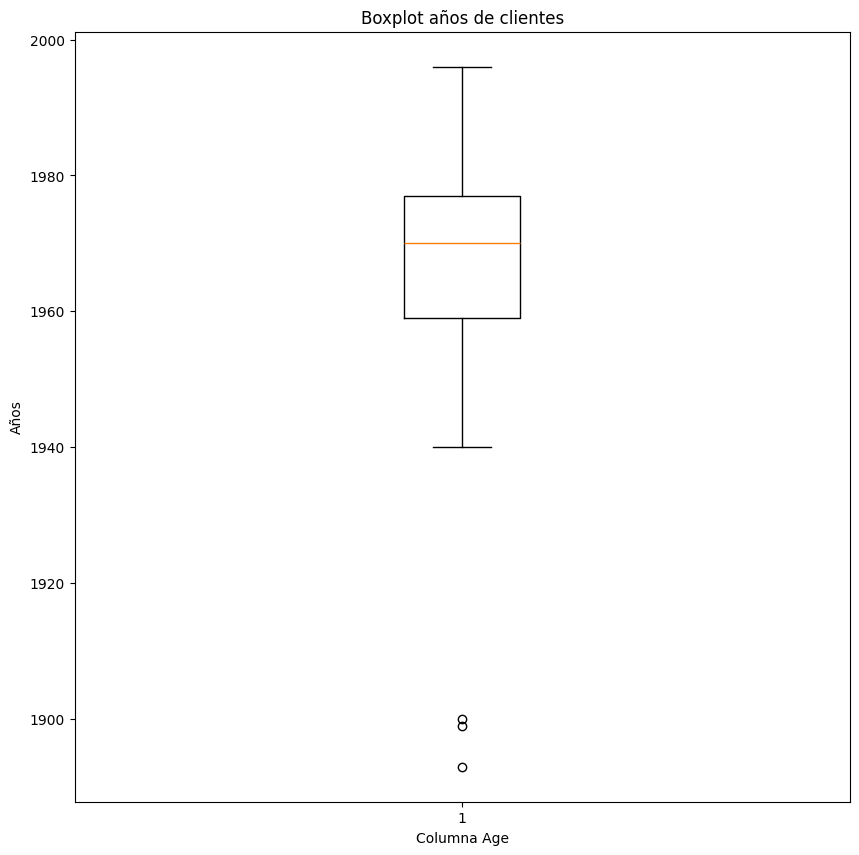

In [16]:
years = cdf.iloc[:, 1]
plt.figure(figsize =(10, 10))
plt.boxplot(years)
plt.title('Boxplot años de clientes')
plt.ylabel('Años')
plt.xlabel('Columna Age')
plt.show()

In [17]:
cdf = cdf[cdf.Year_Birth > 1920]

In [18]:
tiempo_actual = 2024
cdf['Age'] = tiempo_actual - cdf['Year_Birth']
edad = cdf.pop('Age')
cdf.insert(2, 'Age', edad)

/var/folders/4k/4b01rf9j7cl6mcd3652m260w0000gn/T/ipykernel_302/3321122870.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdf['Age'] = tiempo_actual - cdf['Year_Birth']


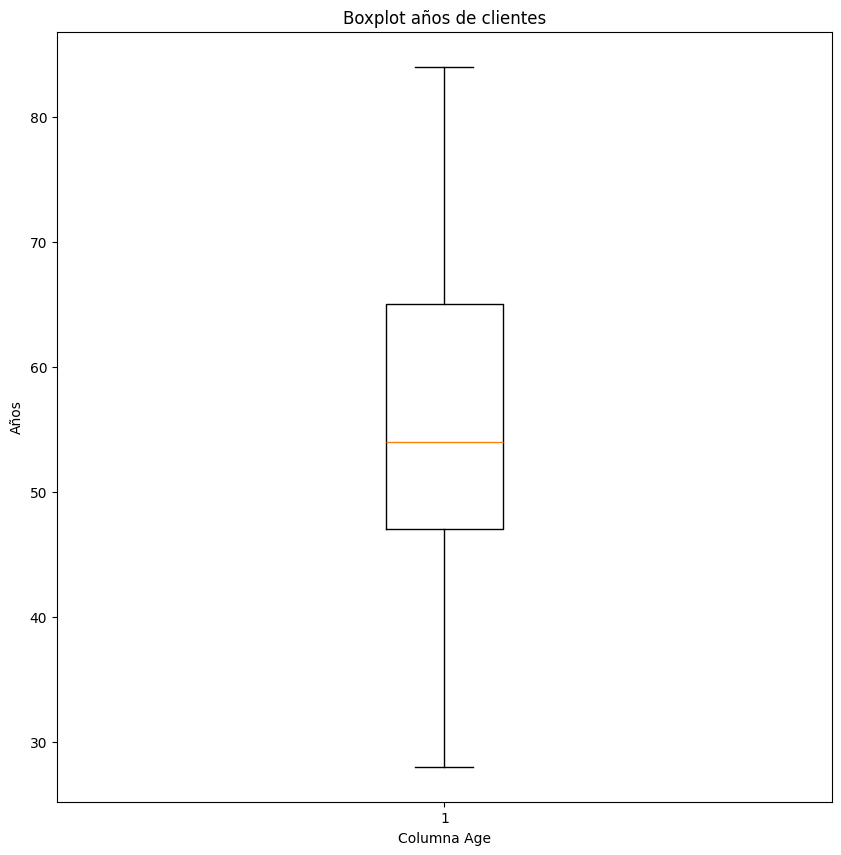

El valor de la mediana es  54.0
El valor de la media es  55.10747872816838


In [19]:
edad = cdf.iloc[:, 2]
mediana = np.median(edad)
media = np.mean(edad)
plt.figure(figsize =(10, 10))
plt.boxplot(edad)
plt.title('Boxplot años de clientes')
plt.ylabel('Años')
plt.xlabel('Columna Age')
plt.show()
print("El valor de la mediana es ", mediana)
print("El valor de la media es ", media)

In [21]:
from sklearn.impute import KNNImputer
import pandas as pd

cdf = cdf.drop('Dt_Customer', axis=1)

nan_instance = cdf[cdf.isna().any(axis=1)]
display(nan_instance)

k = 1

imputer = KNNImputer(n_neighbors=k)

filled_cdf = imputer.fit_transform(cdf)

cdf = pd.DataFrame(filled_cdf, columns=cdf.columns)




nan_instance = cdf[cdf.isna().any(axis=1)]
display(nan_instance)

display(cdf)




,ID,Year_Birth,Age,Educational_num,Marital_Num,Income,Recency,MntWines,MntFruits,Young_Sons,...,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Deals_Accepted,Complain,Response
10,1994,1983,41,2,0,NaN,11,5,5,1,...,2,1,1,1,0,2,7,0,0,0
27,5255,1986,38,2,1,NaN,19,5,1,1,...,263,362,0,27,0,0,1,0,0,0
43,7281,1959,65,4,1,NaN,80,81,11,0,...,2,39,1,1,3,4,2,0,0,0
48,7244,1951,73,2,1,NaN,96,48,5,3,...,10,7,3,2,1,4,6,0,0,0
58,8557,1982,42,2,1,NaN,57,11,3,1,...,2,6,2,2,0,3,6,0,0,0
71,10629,1973,51,0,0,NaN,25,25,3,1,...,4,17,3,3,0,3,8,0,0,0
90,8996,1957,67,4,0,NaN,4,230,42,3,...,37,53,12,7,2,8,9,0,0,0
91,9235,1957,67,2,1,NaN,45,7,0,2,...,0,1,1,1,0,2,7,0,0,0
92,5798,1973,51,3,0,NaN,87,445,37,0,...,28,18,1,2,4,8,1,0,0,0
128,8268,1961,63,4,0,NaN,23,352,0,1,...,0,15,3,6,1,7,6,0,0,0


,ID,Year_Birth,Age,Educational_num,Marital_Num,Income,Recency,MntWines,MntFruits,Young_Sons,...,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Deals_Accepted,Complain,Response


,ID,Year_Birth,Age,Educational_num,Marital_Num,Income,Recency,MntWines,MntFruits,Young_Sons,...,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Deals_Accepted,Complain,Response
0,5524.0,1957.0,67.0,2.0,1.0,58138.0,58.0,635.0,88.0,0.0,...,88.0,88.0,3.0,8.0,10.0,4.0,7.0,0.0,0.0,1.0
1,2174.0,1954.0,70.0,2.0,1.0,46344.0,38.0,11.0,1.0,2.0,...,1.0,6.0,2.0,1.0,1.0,2.0,5.0,0.0,0.0,0.0
2,4141.0,1965.0,59.0,2.0,0.0,71613.0,26.0,426.0,49.0,0.0,...,21.0,42.0,1.0,8.0,2.0,10.0,4.0,0.0,0.0,0.0
3,6182.0,1984.0,40.0,2.0,0.0,26646.0,26.0,11.0,4.0,1.0,...,3.0,5.0,2.0,2.0,0.0,4.0,6.0,0.0,0.0,0.0
4,5324.0,1981.0,43.0,4.0,0.0,58293.0,94.0,173.0,43.0,1.0,...,27.0,15.0,5.0,5.0,3.0,6.0,5.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2228,10870.0,1967.0,57.0,2.0,0.0,61223.0,46.0,709.0,43.0,1.0,...,118.0,247.0,2.0,9.0,3.0,4.0,5.0,0.0,0.0,0.0
2229,4001.0,1946.0,78.0,4.0,0.0,64014.0,56.0,406.0,0.0,3.0,...,0.0,8.0,7.0,8.0,2.0,5.0,7.0,1.0,0.0,0.0
2230,7270.0,1981.0,43.0,2.0,1.0,56981.0,91.0,908.0,48.0,0.0,...,12.0,24.0,1.0,2.0,3.0,13.0,6.0,1.0,0.0,0.0
2231,8235.0,1956.0,68.0,3.0,0.0,69245.0,8.0,428.0,30.0,1.0,...,30.0,61.0,2.0,6.0,5.0,10.0,3.0,0.0,0.0,0.0


# Analisis 1: Compras

Se hace un diagrama de barras para saber donde mas compran los clientes

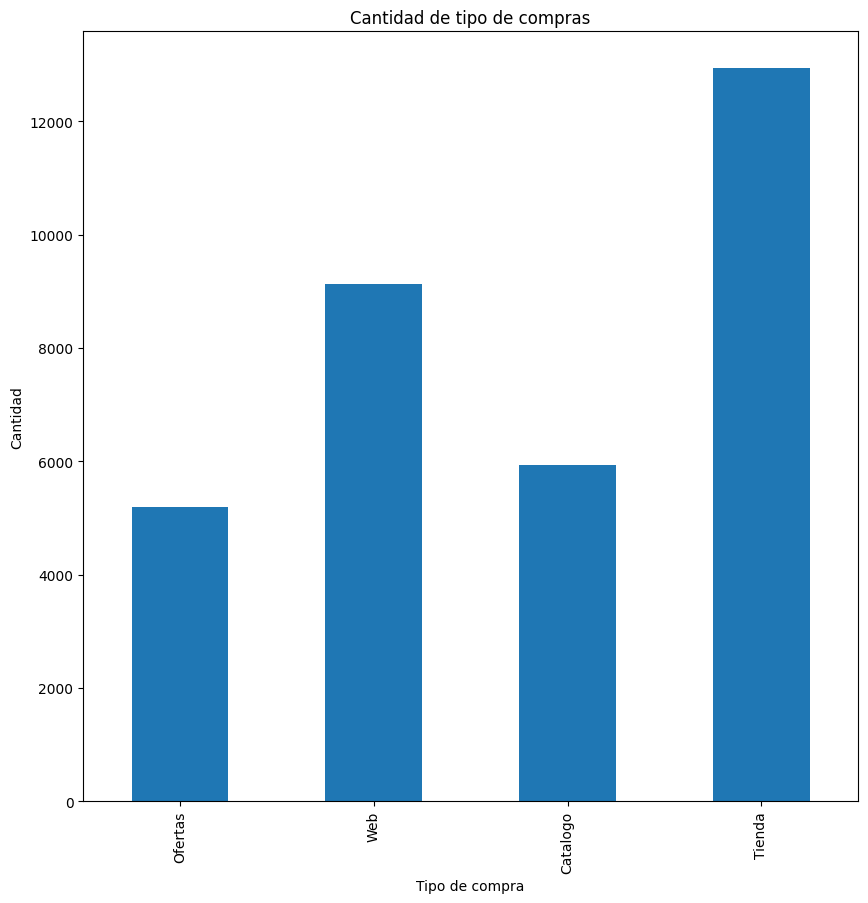

In [22]:
suma_ofertas = cdf['NumDealsPurchases'].sum()
suma_web = cdf['NumWebPurchases'].sum()
suma_catalogo = cdf['NumCatalogPurchases'].sum()
suma_tienda = cdf['NumStorePurchases'].sum()

cantidad_compras = pd.Series([suma_ofertas, suma_web, suma_catalogo, suma_tienda])
plt.figure(figsize=(10,10))
cantidad_compras.plot(kind='bar')
plt.title('Cantidad de tipo de compras')
plt.xlabel('Tipo de compra')
plt.ylabel('Cantidad')
plt.xticks(range(len(cantidad_compras)), ['Ofertas', 'Web', 'Catalogo', 'Tienda'])
plt.show()

# Normalizaciones

In [29]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler


columns_to_normalize_z = ['Income']

cdf_normalized = cdf.copy()

scaler = StandardScaler()
min_max_scaler = MinMaxScaler()

cdf_normalized[columns_to_normalize_z] = scaler.fit_transform(cdf_normalized[columns_to_normalize_z])

display(cdf_normalized)  

,ID,Year_Birth,Age,Educational_num,Marital_Num,Income,Recency,MntWines,MntFruits,Young_Sons,...,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Deals_Accepted,Complain,Response
0,5524.0,1957.0,67.0,2.0,1.0,0.235187,58.0,635.0,88.0,0.0,...,88.0,88.0,3.0,8.0,10.0,4.0,7.0,0.0,0.0,1.0
1,2174.0,1954.0,70.0,2.0,1.0,-0.232686,38.0,11.0,1.0,2.0,...,1.0,6.0,2.0,1.0,1.0,2.0,5.0,0.0,0.0,0.0
2,4141.0,1965.0,59.0,2.0,0.0,0.769746,26.0,426.0,49.0,0.0,...,21.0,42.0,1.0,8.0,2.0,10.0,4.0,0.0,0.0,0.0
3,6182.0,1984.0,40.0,2.0,0.0,-1.014113,26.0,11.0,4.0,1.0,...,3.0,5.0,2.0,2.0,0.0,4.0,6.0,0.0,0.0,0.0
4,5324.0,1981.0,43.0,4.0,0.0,0.241336,94.0,173.0,43.0,1.0,...,27.0,15.0,5.0,5.0,3.0,6.0,5.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2228,10870.0,1967.0,57.0,2.0,0.0,0.357570,46.0,709.0,43.0,1.0,...,118.0,247.0,2.0,9.0,3.0,4.0,5.0,0.0,0.0,0.0
2229,4001.0,1946.0,78.0,4.0,0.0,0.468290,56.0,406.0,0.0,3.0,...,0.0,8.0,7.0,8.0,2.0,5.0,7.0,1.0,0.0,0.0
2230,7270.0,1981.0,43.0,2.0,1.0,0.189288,91.0,908.0,48.0,0.0,...,12.0,24.0,1.0,2.0,3.0,13.0,6.0,1.0,0.0,0.0
2231,8235.0,1956.0,68.0,3.0,0.0,0.675806,8.0,428.0,30.0,1.0,...,30.0,61.0,2.0,6.0,5.0,10.0,3.0,0.0,0.0,0.0


# Revisión K-means

#### Cargamos funciones necesarias para las metricas

In [24]:


def getDistances(A):
    if not isinstance(A, np.ndarray):
        A = A.values.reshape(-1, A.shape[-1])

    n = A.shape[0]
    Distance = np.zeros((n,n))
    for i in range(n):
        for j in range(i, n):
            Distance[i,j] = np.linalg.norm(A[i] - A[j])
            Distance[j,i] = Distance[i,j]
    return Distance


def getW(D,U,V):
    weight = 0
    for i in U:
        for j in V:
            weight += D[i,j]
    return weight
    


def getWIn(D,C):
    Win = 0
    clusters = set(C)
    for cluster in clusters:
        indices = [i for i, x in enumerate(C) if x == cluster]
        Win += getW(D, indices, indices)
    return round(Win/2, 0)

def getWOut(D,C):
    Wout = 0
    clusters = set(C)
    for cluster in clusters:
        indices = [i for i, x in enumerate(C) if x == cluster]
        for i in indices:
            for j in range(len(D)):
                if j in indices:
                    continue
                Wout += D[i,j]
    return round(Wout/2,0)

def getNIn(C):
    Nin = 0
    clusters = set(C)
    for cluster in clusters:
        n = [i for i, x in enumerate(C) if x == cluster]
        Nin += len(n) * (len(n)-1)/2
    return Nin

def getNOut(C):
    n = len(C)
    Nout = (n*(n-1)/2) - getNIn(C)
    return Nout

def getBetaCV(A, C):
    D = getDistances(A)

    
    W_in = getWIn(D, C)
    W_out = getWOut(D, C)
    N_in = getNIn(C)
    N_out = getNOut(C)
    
    if N_in != 0 and N_out != 0:
        beta_cv = (W_in / N_in) / (W_out / N_out)
    else:
        return None
    
    return beta_cv

def getCIndex(A,C):
    
    D = getDistances(A)
    Nin = getNIn(C)
    Win = getWIn(D, C)
    Wflat = np.ravel(D)
    Wmin = np.sum(np.partition(Wflat, int(Nin))[:int(Nin)])
    Wmax = np.sum(np.partition(Wflat, -int(Nin))[-int(Nin):])
    
    CIndex = ((Win - Wmin)/(Wmax - Wmin))/2
    return CIndex


#### K-Means

Graficamos resultados de KMeans por metrica, revisando que cantidad de clusters se comporta mejor

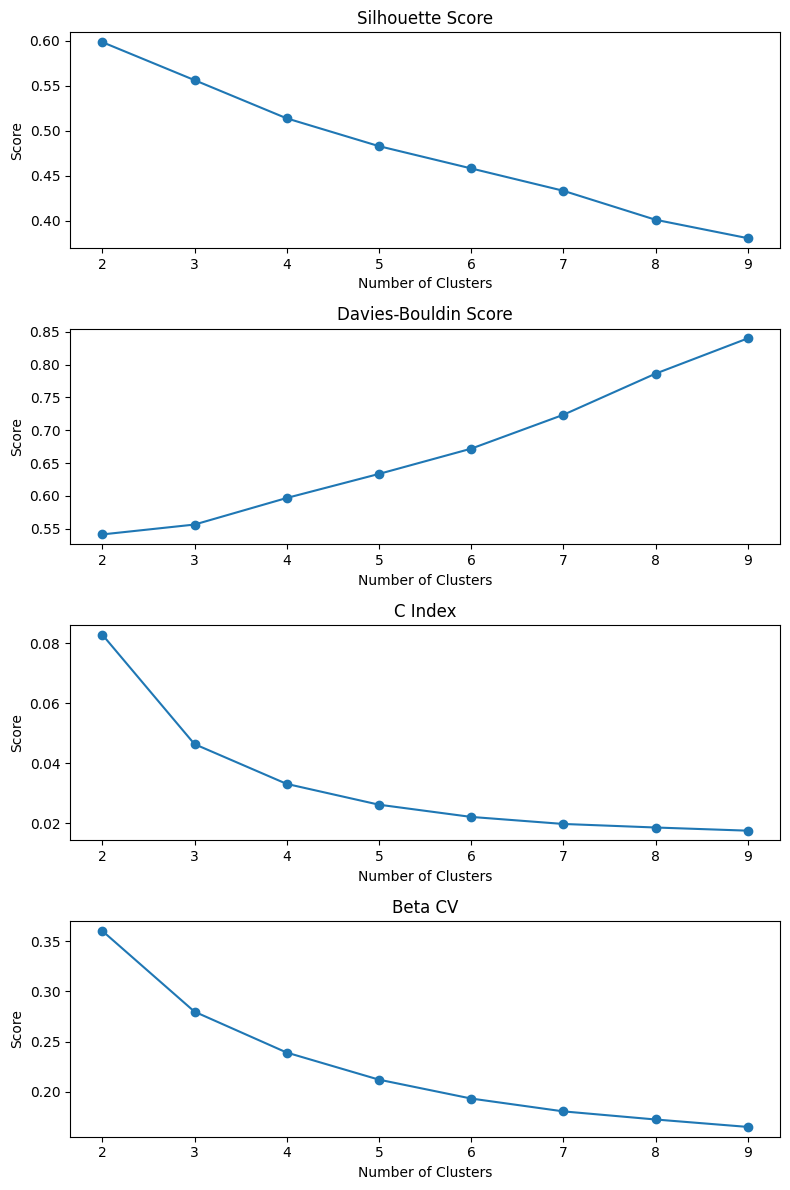

In [27]:
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN
from sklearn import metrics
import matplotlib.pyplot as plt

def cluster_analysis(df):

    cluster_range = range(2, 10)


    silhouette_scores = []
    db_scores = []
    cIndex_scores = []
    betaCV_scores = []

    for n_clusters in cluster_range:
       
        kmeans = KMeans(n_clusters=n_clusters, init = 'random', n_init=30)
        kmeans_labels = kmeans.fit_predict(df)

        # DBSCAN clustering
        dbscan = DBSCAN()
        dbscan_labels = dbscan.fit_predict(df)

        # Calcular las métricas para K-Means
        silhouette_scores.append(metrics.silhouette_score(df, kmeans_labels))
        db_scores.append(metrics.davies_bouldin_score(df, kmeans_labels))
        cIndex_scores.append(getCIndex(df, kmeans_labels))
        betaCV_scores.append(getBetaCV(df, kmeans_labels))


    # Crear gráficos para cada métrica
    fig, axs = plt.subplots(4, 1, figsize=(8, 12))

    axs[0].plot(cluster_range, silhouette_scores, marker='o')
    axs[0].set_title('Silhouette Score')
    axs[0].set_xlabel('Number of Clusters')
    axs[0].set_ylabel('Score')

    axs[1].plot(cluster_range, db_scores, marker='o')
    axs[1].set_title('Davies-Bouldin Score')
    axs[1].set_xlabel('Number of Clusters')
    axs[1].set_ylabel('Score')

    axs[2].plot(cluster_range, cIndex_scores, marker='o')
    axs[2].set_title('C Index')
    axs[2].set_xlabel('Number of Clusters')
    axs[2].set_ylabel('Score')

    axs[3].plot(cluster_range, betaCV_scores, marker='o')
    axs[3].set_title('Beta CV')
    axs[3].set_xlabel('Number of Clusters')
    axs[3].set_ylabel('Score')

    plt.tight_layout()
    plt.show()

# Llamar a la función para realizar el análisis de clusterización
cluster_analysis(cdf_normalized)


#### Metricas para DBSCAN

[2.7074633305034955e-06, 55.575313168576706, 82.64899845106743, 100.02418067695383, 112.9296492785287, 123.25055974278058, 131.9717067694992, 139.54446217745542, 146.3250731423438] [1, 2, 3, 4, 5, 6, 7, 8, 9]


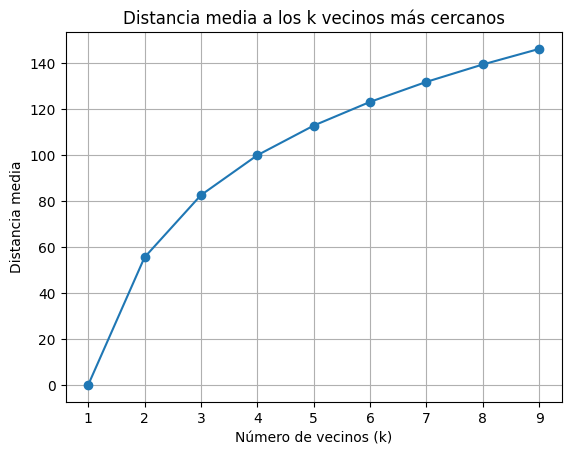

In [32]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors



# Entrenar un modelo k-NN con diferentes valores de k
k_values = [1,2, 3, 4, 5, 6, 7, 8, 9]  # Valores de k a probar
distances = []  # Almacenar las distancias de los k vecinos más cercanos para cada valor de k

for k in k_values:
    knn = NearestNeighbors(n_neighbors=k)
    knn.fit(cdf_normalized)
    # Calcular las distancias a los k vecinos más cercanos para cada punto
    dist, _ = knn.kneighbors(cdf_normalized)
    # Calcular la distancia media a los k vecinos más cercanos para cada punto
    avg_distances = np.mean(dist, axis=1)
    # Calcular la distancia media global
    mean_avg_distance = np.mean(avg_distances)
    distances.append(mean_avg_distance)

print(distances, k_values)
# Graficar los resultados
plt.plot(k_values, distances, marker='o')
plt.title('Distancia media a los k vecinos más cercanos')
plt.xlabel('Número de vecinos (k)')
plt.ylabel('Distancia media')
plt.xticks(k_values)
plt.grid(True)
plt.show()

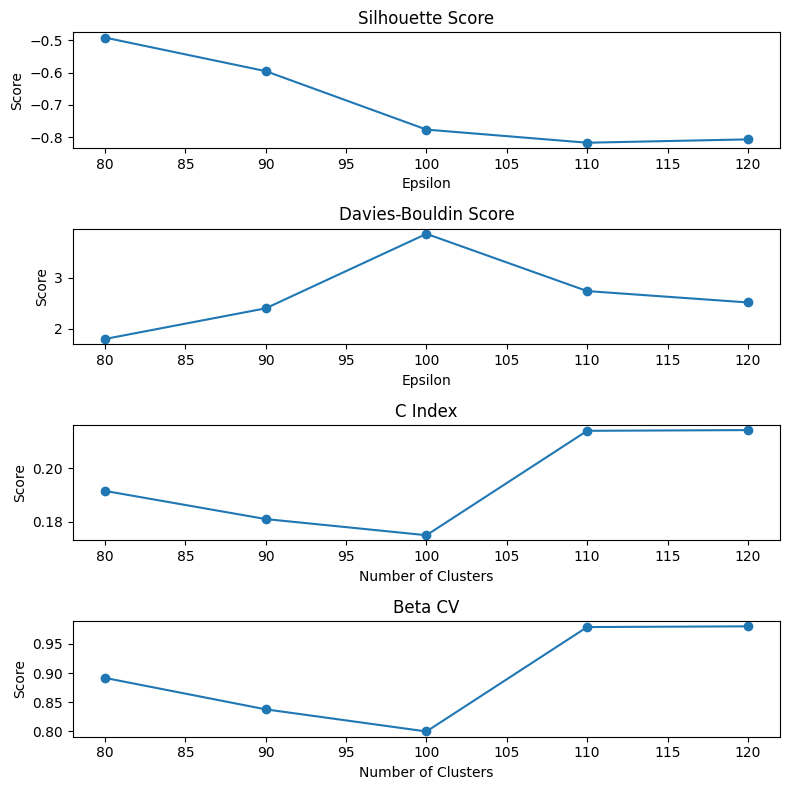

In [35]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn import metrics
import matplotlib.pyplot as plt

def cluster_analysis(df):

    eps_values = [80, 90, 100, 110, 120]  # Valores de epsilon para probar
    min_samples = 3  # Número mínimo de muestras para DBSCAN

    silhouette_scores = []
    db_scores = []
    cIndex_scores = []
    betaCV_scores = []

    for eps in eps_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan_labels = dbscan.fit_predict(df)

        # Calcular las métricas para DBSCAN
        silhouette_scores.append(metrics.silhouette_score(df, dbscan_labels))
        db_scores.append(metrics.davies_bouldin_score(df, dbscan_labels))
        cIndex_scores.append(getCIndex(df, dbscan_labels))
        betaCV_scores.append(getBetaCV(df, dbscan_labels))

    # Crear gráficos para cada métrica
    fig, axs = plt.subplots(4, 1, figsize=(8, 8))

    axs[0].plot(eps_values, silhouette_scores, marker='o')
    axs[0].set_title('Silhouette Score')
    axs[0].set_xlabel('Epsilon')
    axs[0].set_ylabel('Score')

    axs[1].plot(eps_values, db_scores, marker='o')
    axs[1].set_title('Davies-Bouldin Score')
    axs[1].set_xlabel('Epsilon')
    axs[1].set_ylabel('Score')

    axs[2].plot(eps_values, cIndex_scores, marker='o')
    axs[2].set_title('C Index')
    axs[2].set_xlabel('Epsilon')
    axs[2].set_ylabel('Score')

    axs[3].plot(eps_values, betaCV_scores, marker='o')
    axs[3].set_title('Beta CV')
    axs[3].set_xlabel('Epsilon')
    axs[3].set_ylabel('Score')


    plt.tight_layout()
    plt.show()

# Llamar a la función para realizar el análisis de clusterización
cluster_analysis(cdf_normalized)


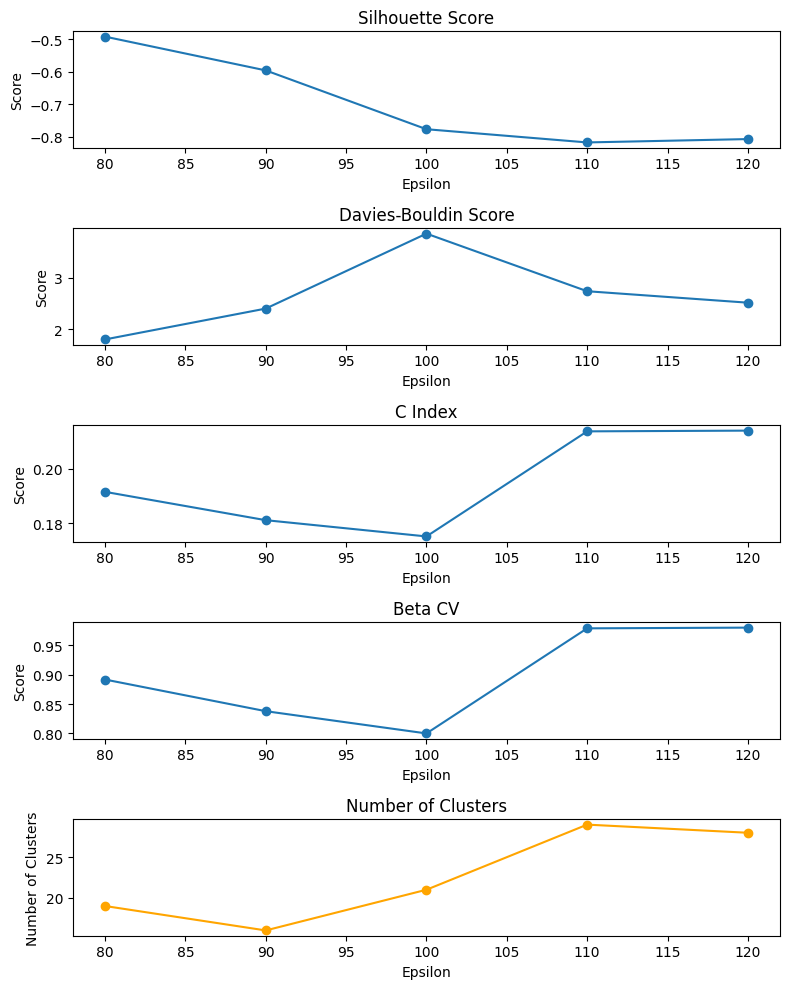

In [36]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn import metrics
import matplotlib.pyplot as plt

def cluster_analysis(df):

    eps_values = [80, 90, 100, 110, 120]  # Valores de epsilon para probar
    min_samples = 3  # Número mínimo de muestras para DBSCAN

    silhouette_scores = []
    db_scores = []
    cIndex_scores = []
    betaCV_scores = []
    cluster_counts = []  # Lista para almacenar la cantidad de clusters encontrados en cada iteración de epsilon

    for eps in eps_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan_labels = dbscan.fit_predict(df)

        # Contar la cantidad de clusters encontrados
        unique_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)  # Excluir el cluster de ruido (-1)
        cluster_counts.append(unique_clusters)

        # Calcular las métricas para DBSCAN
        silhouette_scores.append(metrics.silhouette_score(df, dbscan_labels))
        db_scores.append(metrics.davies_bouldin_score(df, dbscan_labels))
        cIndex_scores.append(getCIndex(df, dbscan_labels))
        betaCV_scores.append(getBetaCV(df, dbscan_labels))

    # Crear gráficos para cada métrica
    fig, axs = plt.subplots(5, 1, figsize=(8, 10))

    axs[0].plot(eps_values, silhouette_scores, marker='o')
    axs[0].set_title('Silhouette Score')
    axs[0].set_xlabel('Epsilon')
    axs[0].set_ylabel('Score')

    axs[1].plot(eps_values, db_scores, marker='o')
    axs[1].set_title('Davies-Bouldin Score')
    axs[1].set_xlabel('Epsilon')
    axs[1].set_ylabel('Score')

    axs[2].plot(eps_values, cIndex_scores, marker='o')
    axs[2].set_title('C Index')
    axs[2].set_xlabel('Epsilon')
    axs[2].set_ylabel('Score')

    axs[3].plot(eps_values, betaCV_scores, marker='o')
    axs[3].set_title('Beta CV')
    axs[3].set_xlabel('Epsilon')
    axs[3].set_ylabel('Score')

    axs[4].plot(eps_values, cluster_counts, marker='o', color='orange')
    axs[4].set_title('Number of Clusters')
    axs[4].set_xlabel('Epsilon')
    axs[4].set_ylabel('Number of Clusters')

    plt.tight_layout()
    plt.show()

# Llamar a la función para realizar el análisis de clusterización
cluster_analysis(cdf_normalized)


In [26]:
# import matplotlib.pyplot as plt
# import numpy as np

# def plotMetrics(D, l=100, kmeans_eps=0.01):
#     k_values = [2, 3, 4, 5]
#     metrics = ['Silhouette', 'CIndex', 'DaviesBouldin', 'BetaCV']
#     kmeans_metrics = {metric: {} for metric in metrics}
#     dbscan_metrics = {metric: {} for metric in metrics}

#     for metric in metrics:
#         for k in k_values:
#             kmeans_metrics[metric][k] = []

#     for k in k_values:
#         # Only K-Means
#         for _ in range(l):
#             cluster, _ = kMeans(D, k, kmeans_eps, None)
#             for metric in metrics:
#                 metric_values = None
#                 if metric == 'Silhouette':
#                     metric_values = getSilhouette(D, cluster)
#                 elif metric == 'CIndex':
#                     metric_values = getCIndex(D, cluster)
#                 elif metric == 'DaviesBouldin':
#                     metric_values = getDaviesBouldin(D, cluster)
#                 elif metric == 'BetaCV':
#                     metric_values = getBetaCV(D, cluster)
                
#                 kmeans_metrics[metric][k].append(metric_values)

#     fig, axes = plt.subplots(4, figsize=(10, 30))
#     axes = axes.flatten()

    
#     for i, (metric, cluster_values) in enumerate(kmeans_metrics.items()):
#         ax = axes[i]
#         ax.set_title(metric)
#         ax.set_xlabel('K Values')
#         ax.set_ylabel('Metric Value')

#         boxplot_data = [cluster_values[k] for k in k_values]
#         ax.boxplot(boxplot_data, labels=k_values)


#     plt.tight_layout()
#     plt.show()